In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
import requests,zipfile


In [19]:
import os
import shutil
import requests
#https://blog.narito.ninja/detail/67/

url = 'https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip'
file_name = os.path.basename(url)
res = requests.get(url, stream=True)
if res.status_code == 200:
    with open('./zip/'+file_name, 'wb') as file:
        res.raw.decode_content = True
        shutil.copyfileobj(res.raw, file)


with zipfile.ZipFile('./zip/'+file_name) as existing_zip:
    #print(existing_zip.namelist())
    existing_zip.extract('2020_JP_Region_Mobility_Report.csv','./csv/')


In [2]:
mb =pd.read_csv('./csv/2020_JP_Region_Mobility_Report.csv')
mb['date'] = pd.to_datetime(mb['date'])
mb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13104 entries, 0 to 13103
Data columns (total 14 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   country_region_code                                 13104 non-null  object        
 1   country_region                                      13104 non-null  object        
 2   sub_region_1                                        12831 non-null  object        
 3   sub_region_2                                        0 non-null      float64       
 4   metro_area                                          0 non-null      float64       
 5   iso_3166_2_code                                     12831 non-null  object        
 6   census_fips_code                                    0 non-null      float64       
 7   date                                                13104 non-null  datetime64[ns]
 8   retail

In [79]:
mb['sub_region_1'].unique()

array([nan, 'Aichi', 'Akita', 'Aomori', 'Chiba', 'Ehime', 'Fukui',
       'Fukuoka', 'Fukushima', 'Gifu', 'Gunma', 'Hiroshima', 'Hokkaido',
       'Hyogo', 'Ibaraki', 'Ishikawa', 'Iwate', 'Kagawa', 'Kagoshima',
       'Kanagawa', 'Kochi', 'Kumamoto', 'Kyoto', 'Mie', 'Miyagi',
       'Miyazaki', 'Nagano', 'Nagasaki', 'Nara', 'Niigata', 'Oita',
       'Okayama', 'Okinawa', 'Osaka', 'Saga', 'Saitama', 'Shiga',
       'Shimane', 'Shizuoka', 'Tochigi', 'Tokushima', 'Tokyo', 'Tottori',
       'Toyama', 'Wakayama', 'Yamagata', 'Yamaguchi', 'Yamanashi'],
      dtype=object)

In [80]:
sub_mb = mb.groupby(['sub_region_1','date']).agg(
    {'retail_and_recreation_percent_change_from_baseline':np.mean,
    'transit_stations_percent_change_from_baseline':np.mean})
sub_mb

retail_and_recreation_percent_change_from_baseline  \
sub_region_1 date                                                             
Aichi        2020-02-15                                                  0    
             2020-02-16                                                 -8    
             2020-02-17                                                 -1    
             2020-02-18                                                  0    
             2020-02-19                                                  1    
...                                                                    ...    
Yamanashi    2020-11-09                                                 -1    
             2020-11-10                                                  3    
             2020-11-11                                                  1    
             2020-11-12                                                  0    
             2020-11-13                                                 -1    

                         transit_stations_percent_change_from_baseline  
sub_region_1 date                                                       
Aichi        2020-02-15                                           -4.0  
             2020-02-16                                          -12.0  
             2020-02-17                                           -2.0  
             2020-02-18                                           -4.0  
             2020-02-19                                           -4.0  
...                                                                ...  
Yamanashi    2020-11-09                                            0.0  
             2020-11-10                                            2.0  
             2020-11-11                                            5.0  
             2020-11-12                                            3.0  
             2020-11-13                                            6.0  

[12831 rows x 2 columns]

C:\Users\kmtk49\Anaconda3\envs\TF2-GPU\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 1440x504 with 0 Axes>

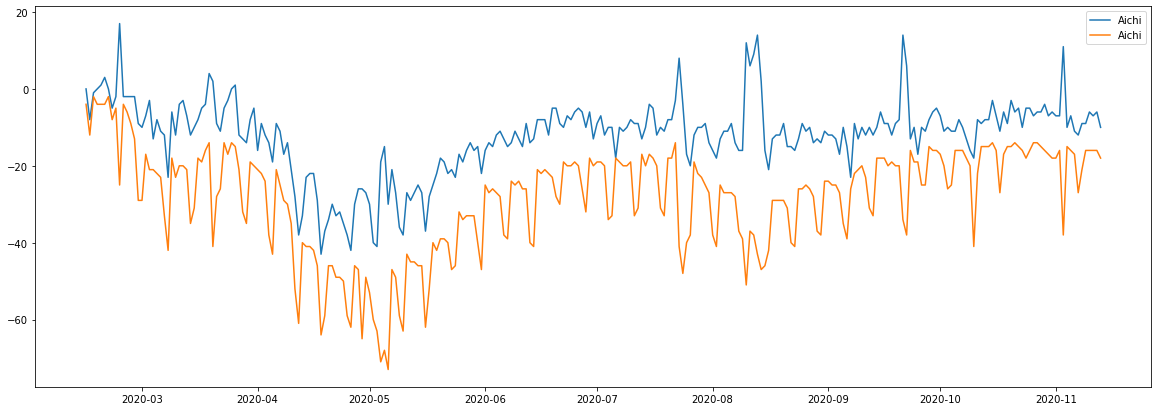

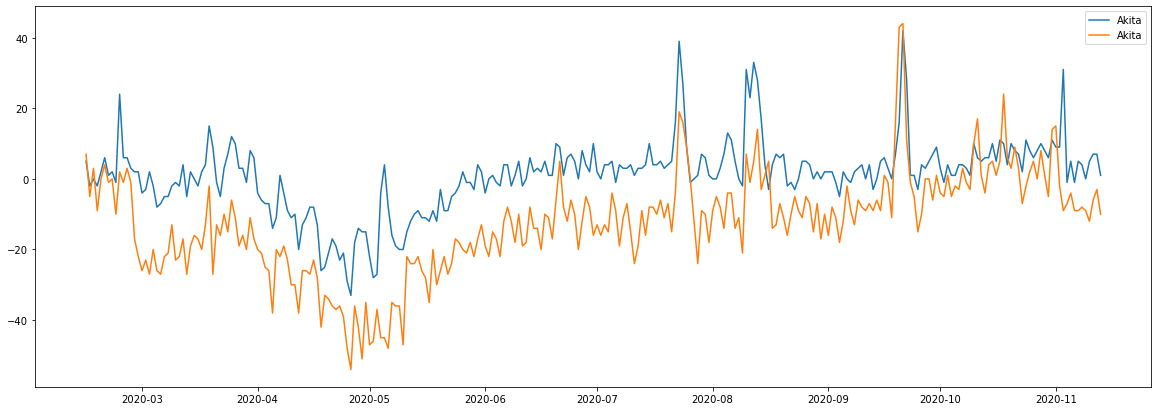

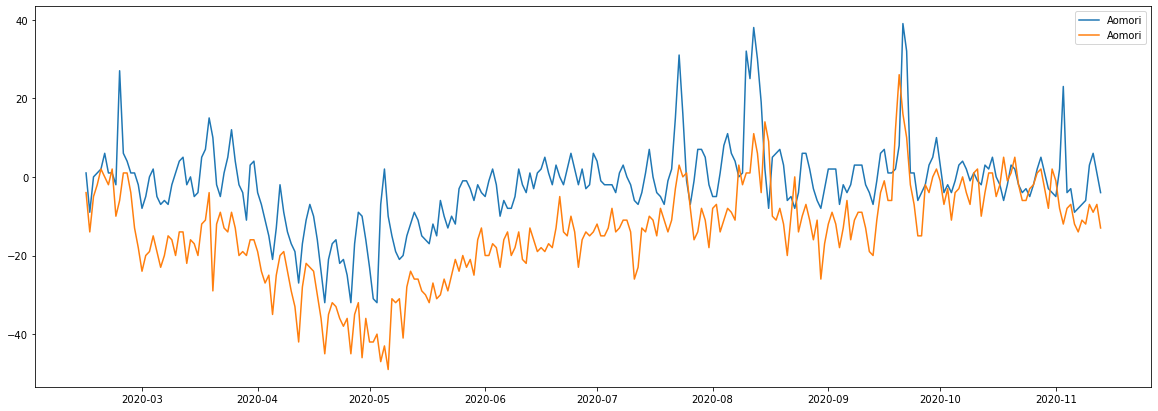

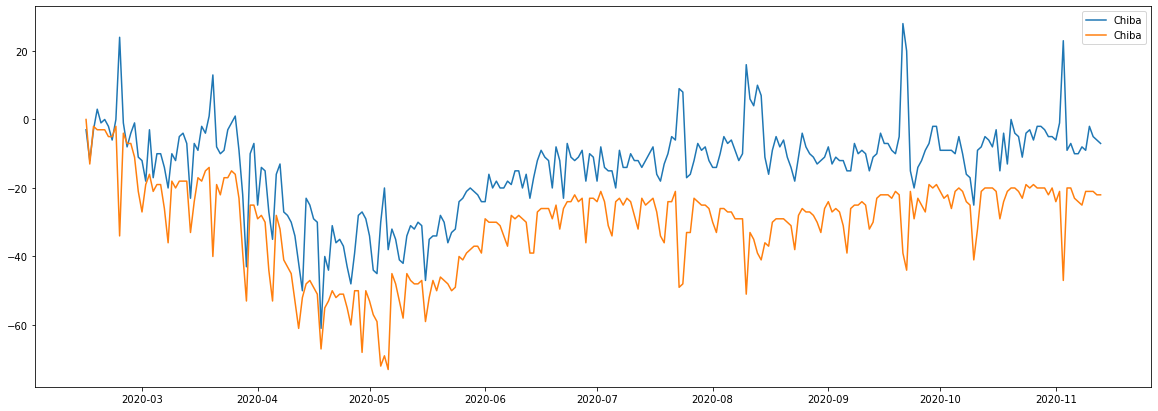

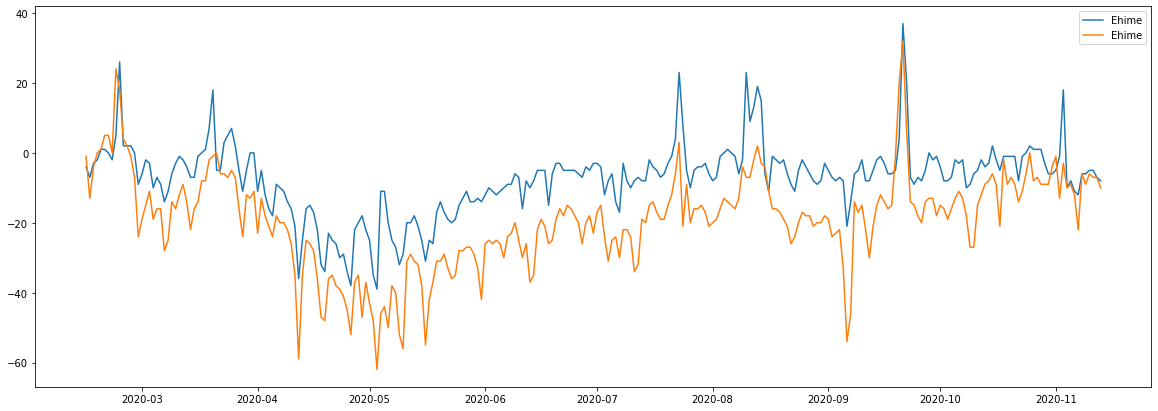

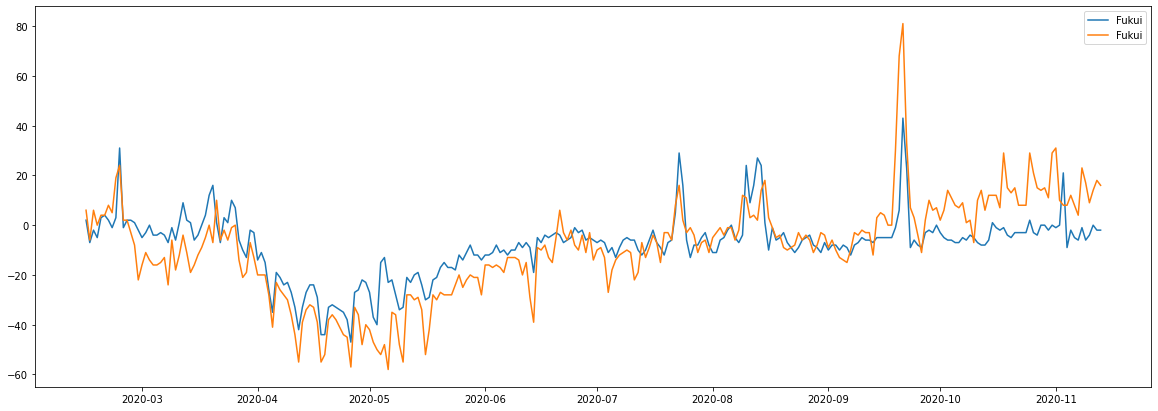

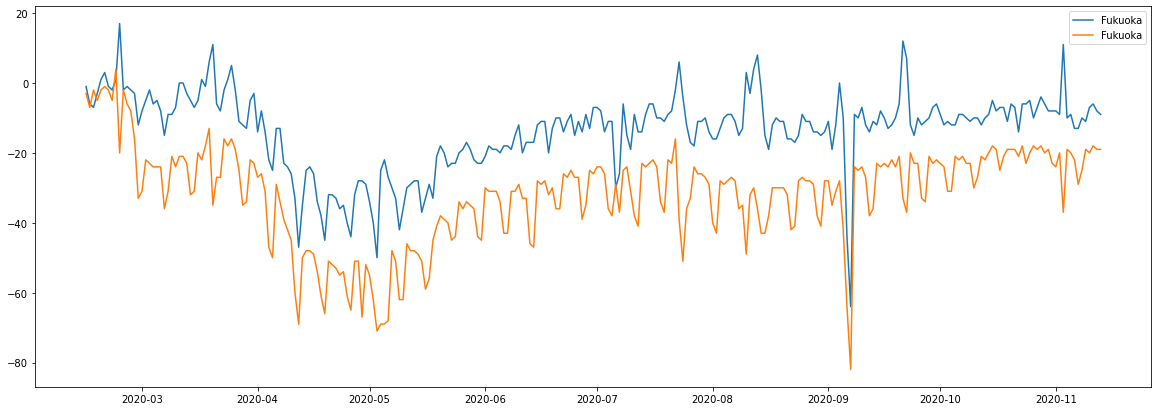

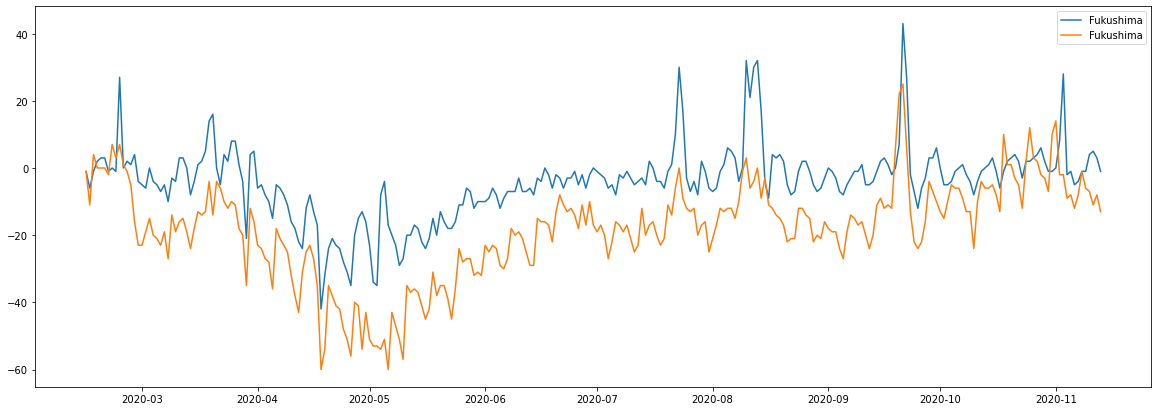

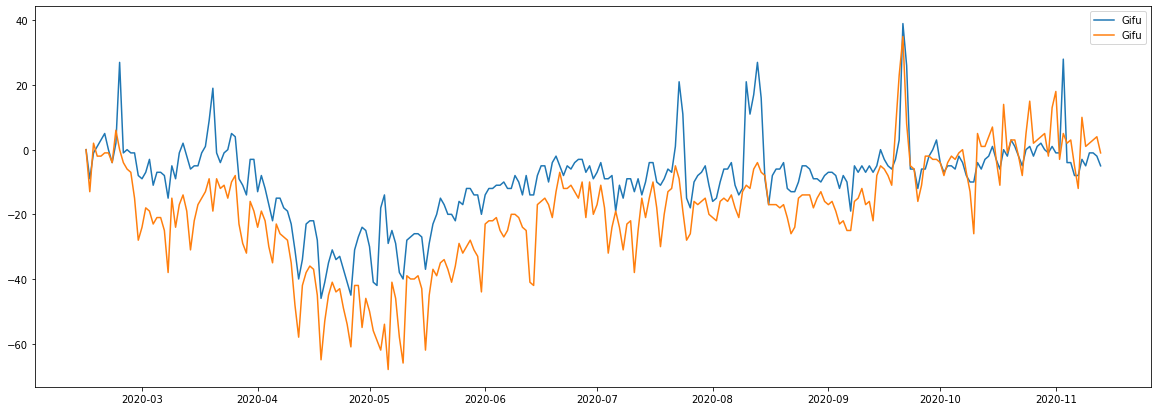

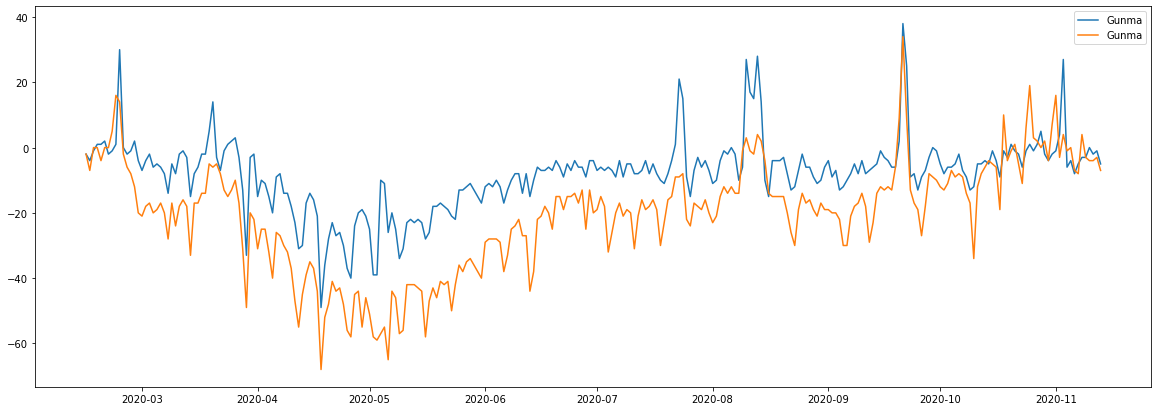

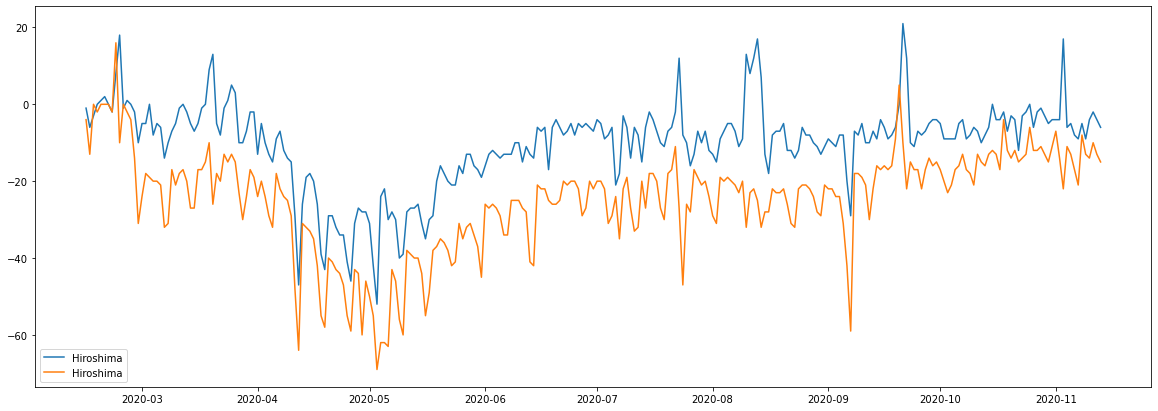

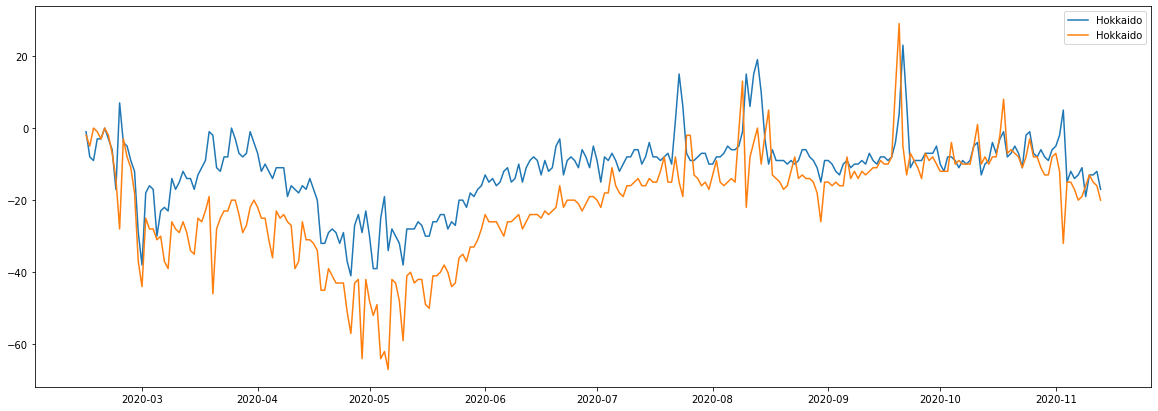

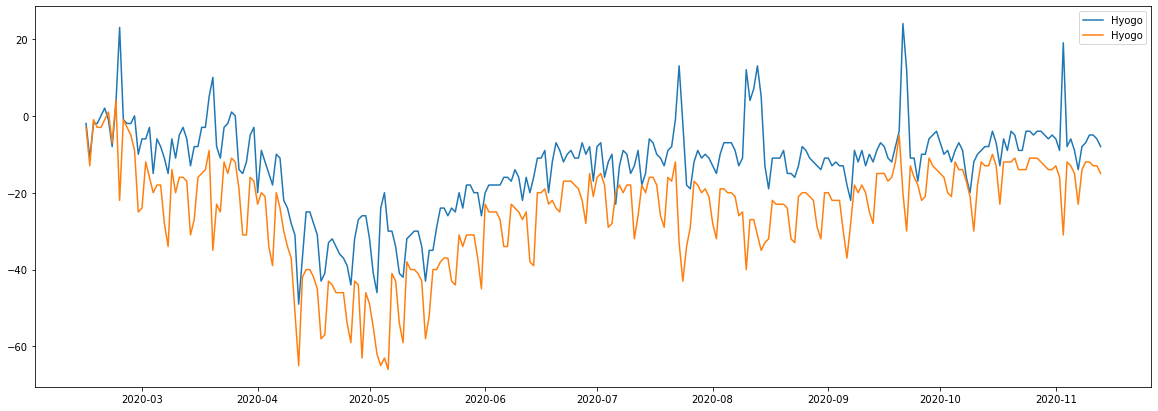

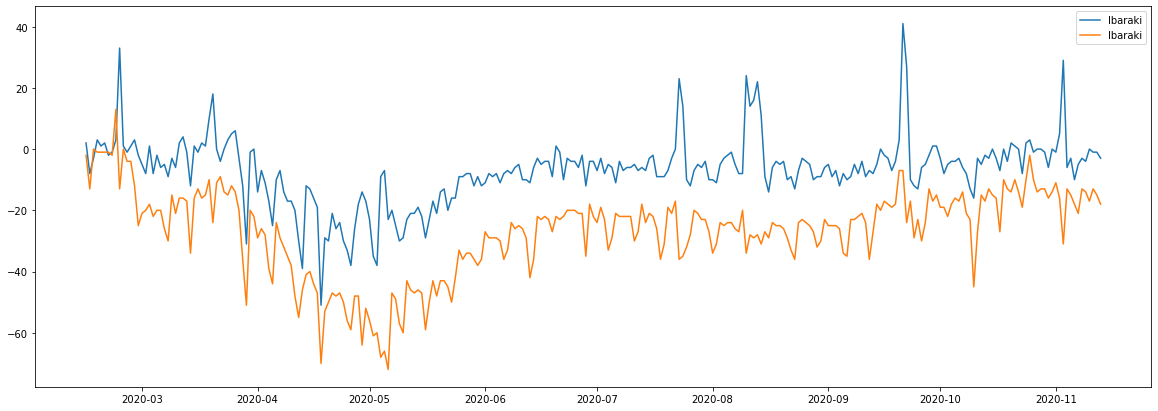

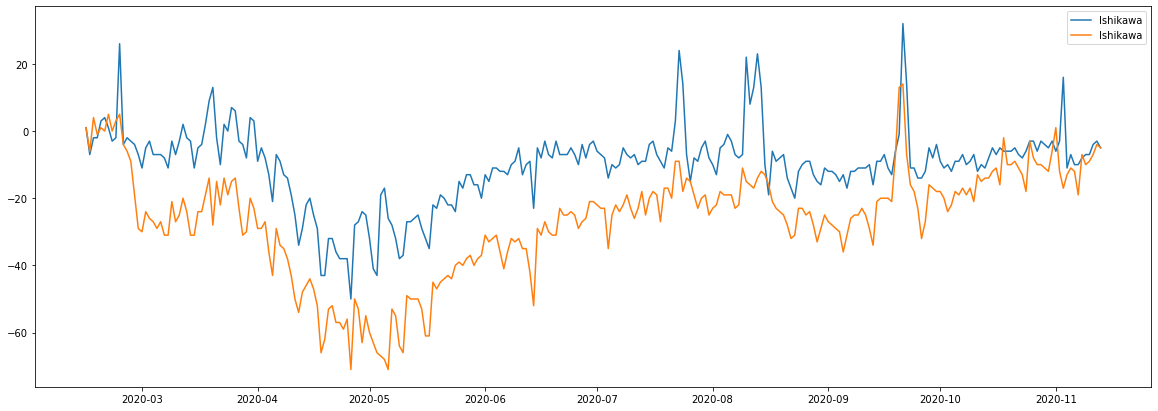

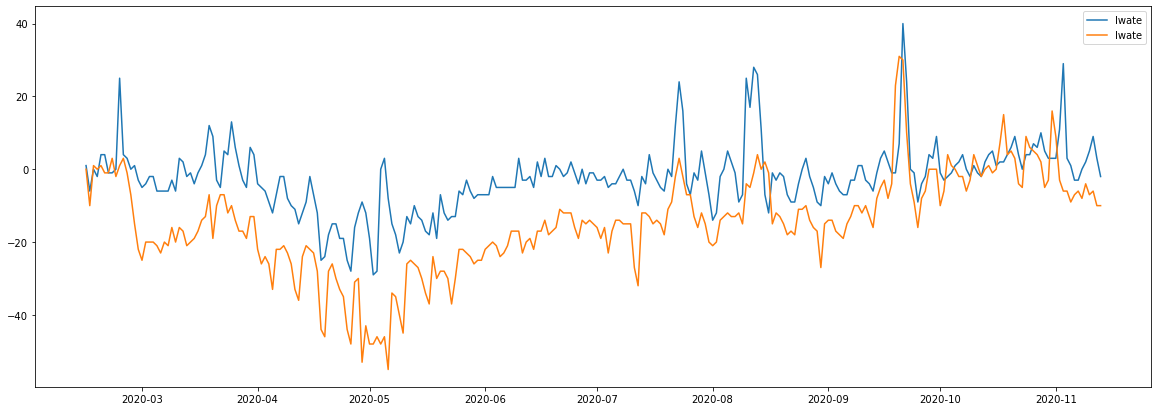

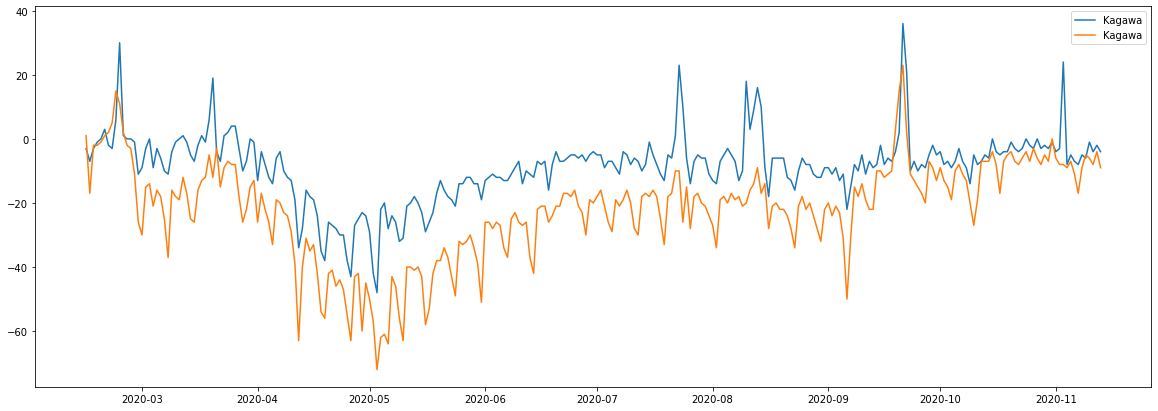

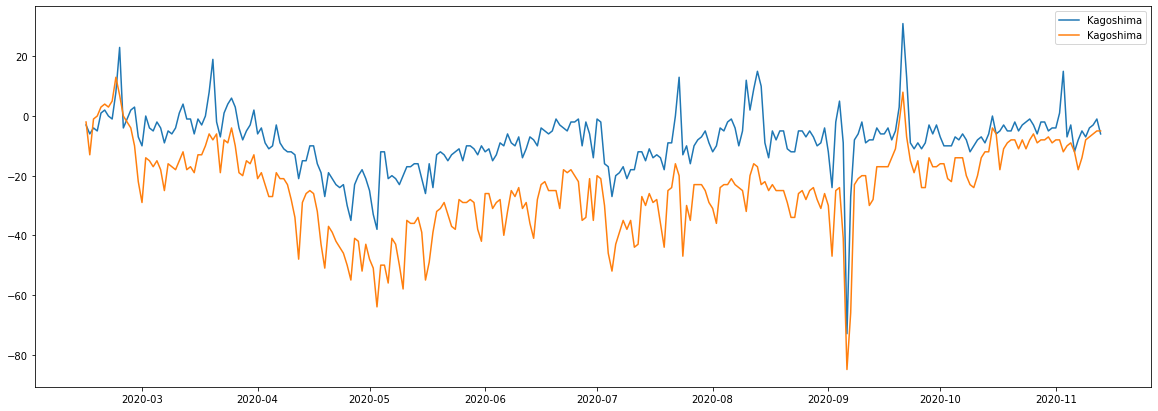

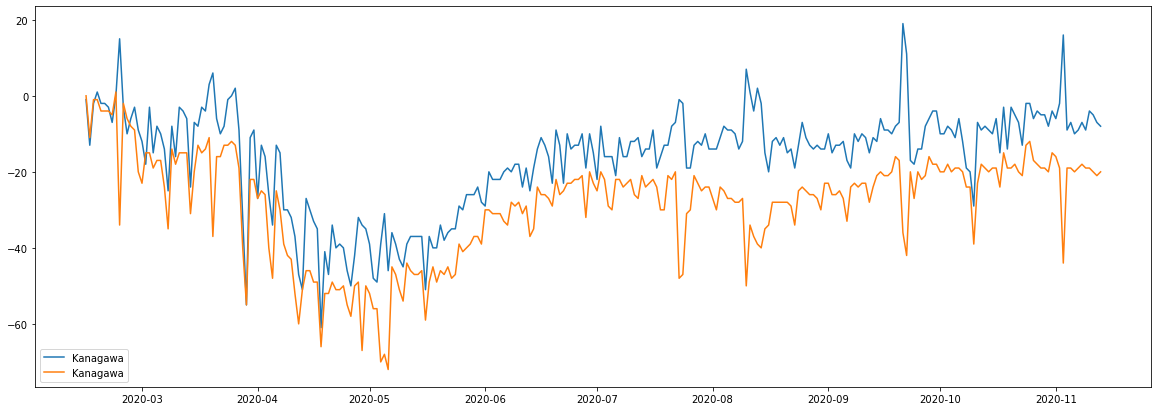

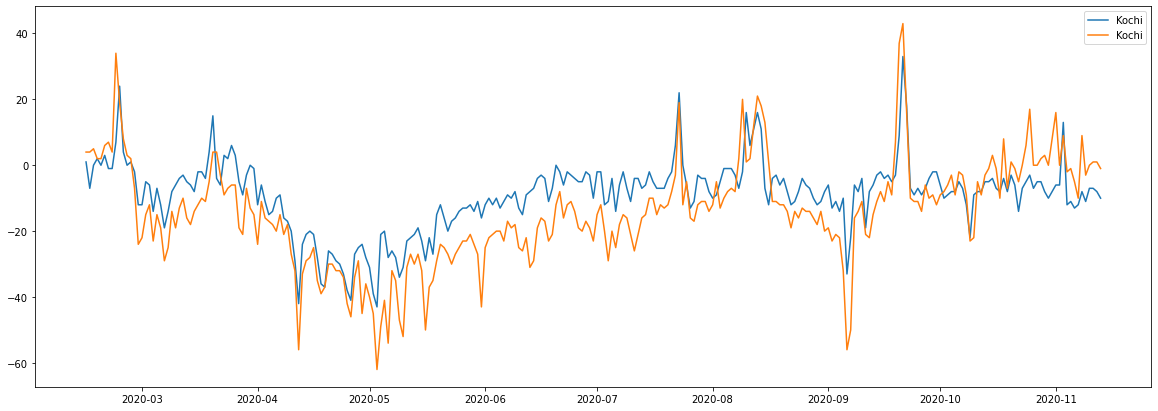

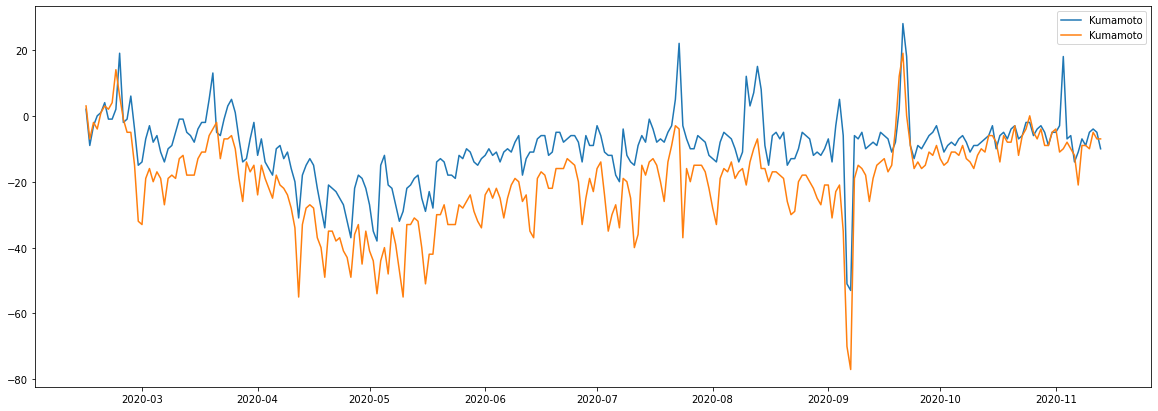

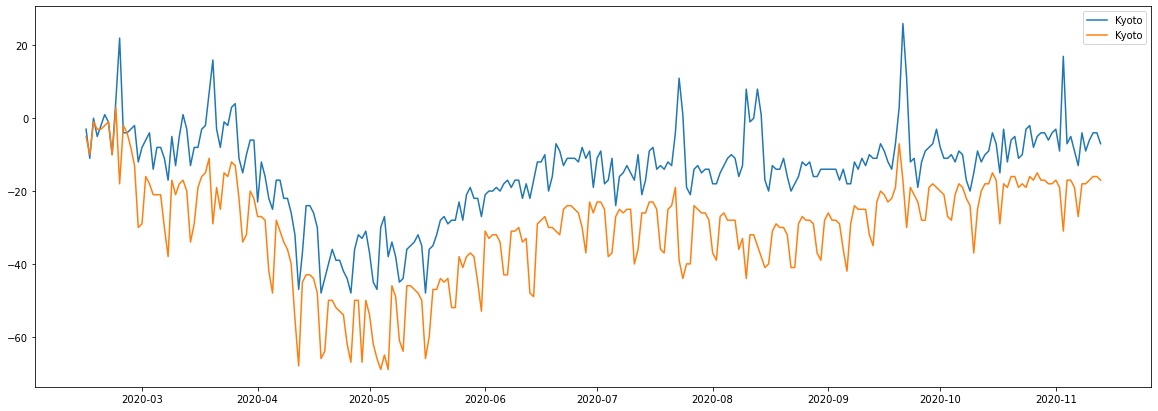

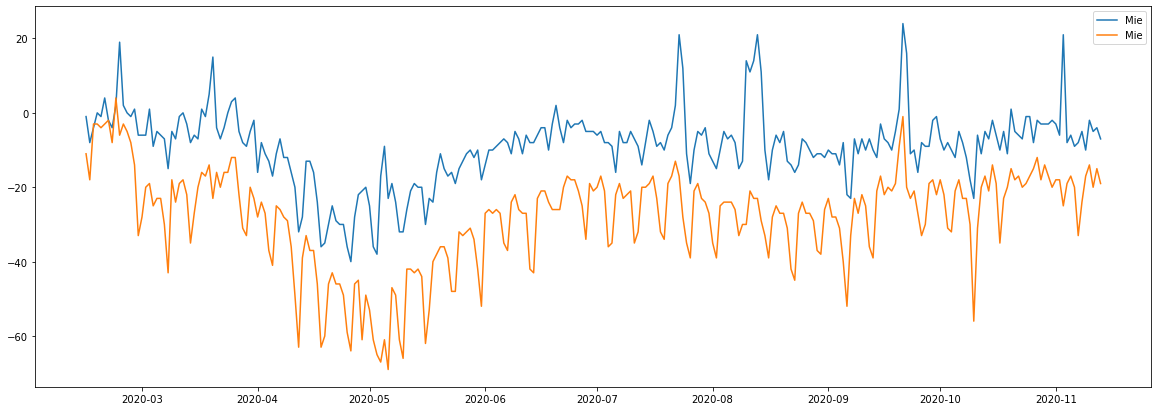

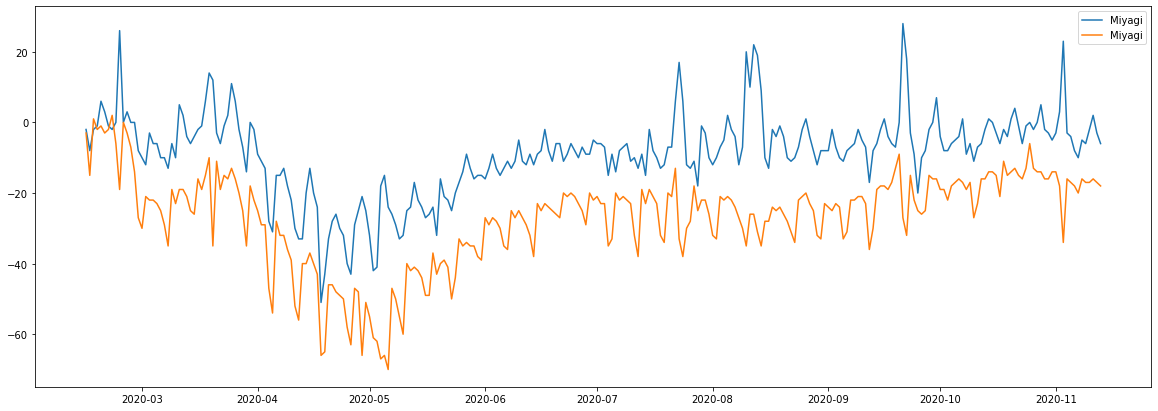

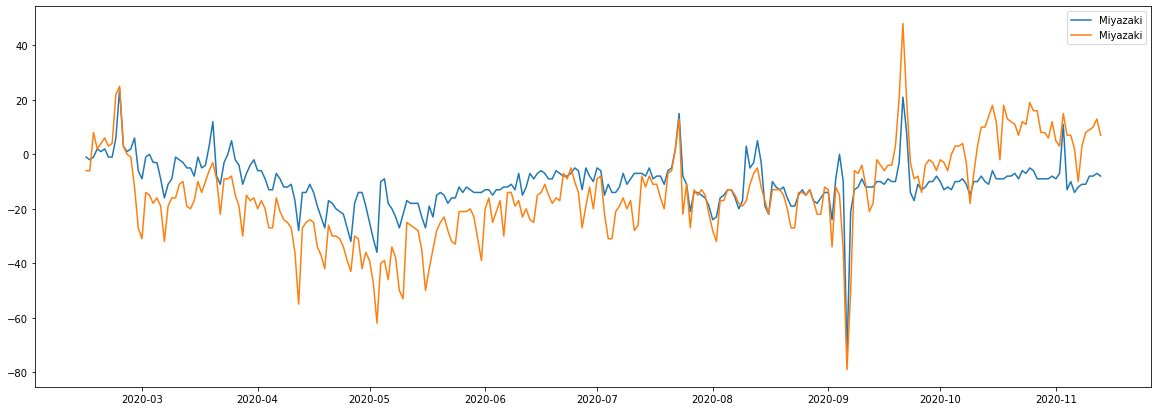

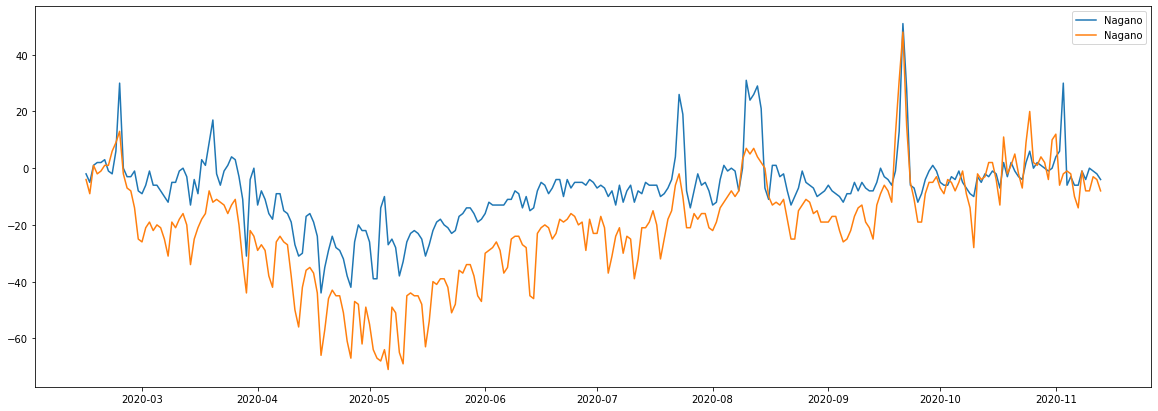

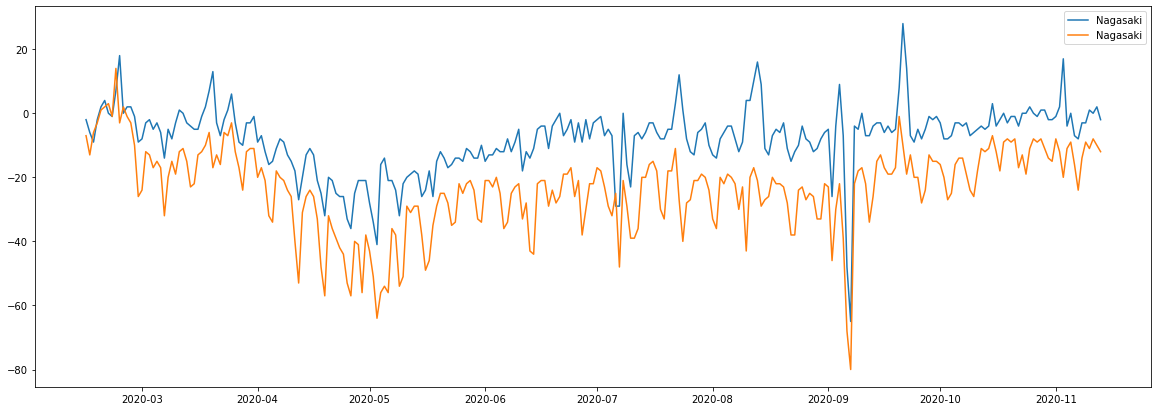

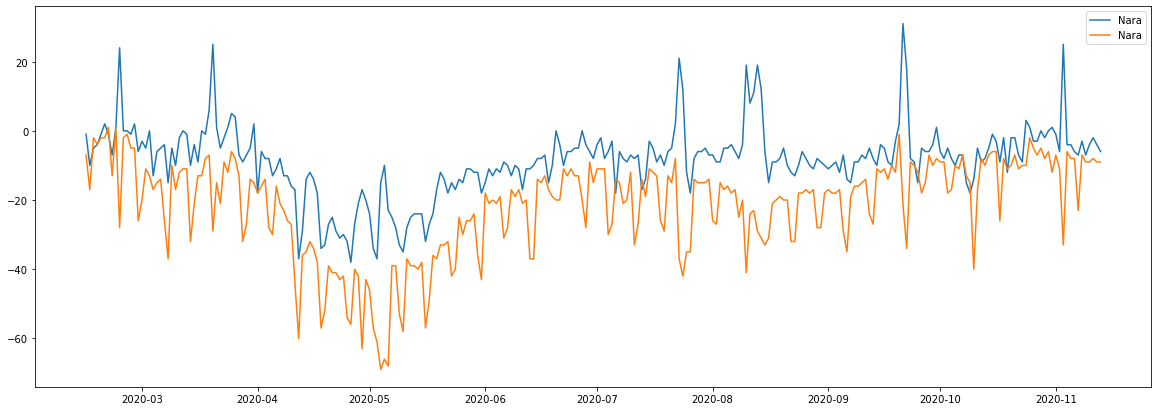

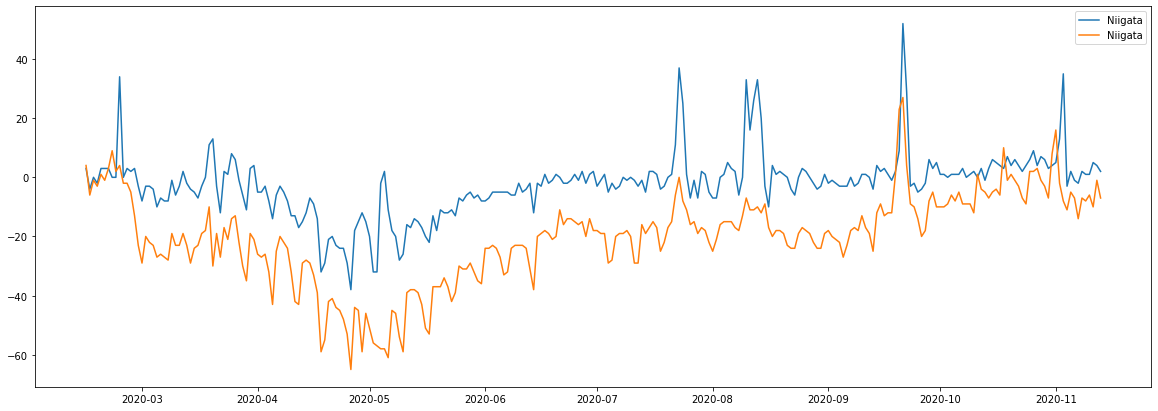

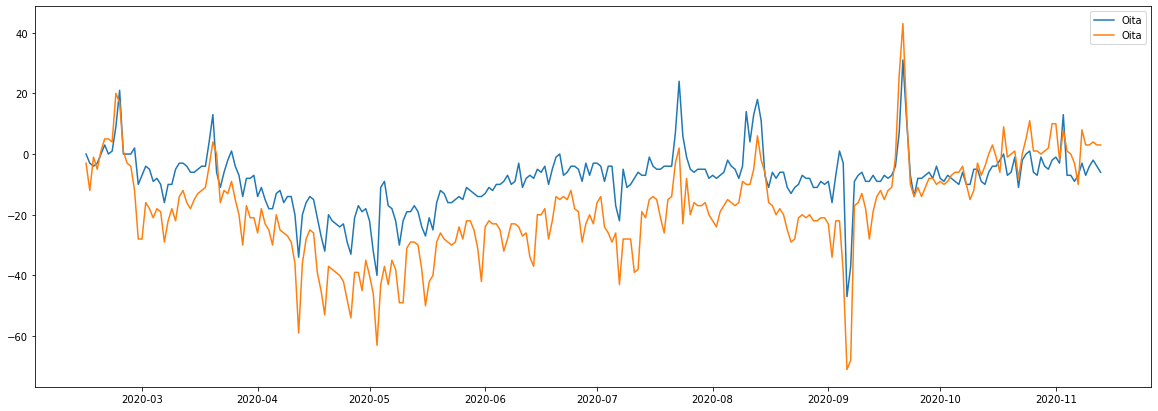

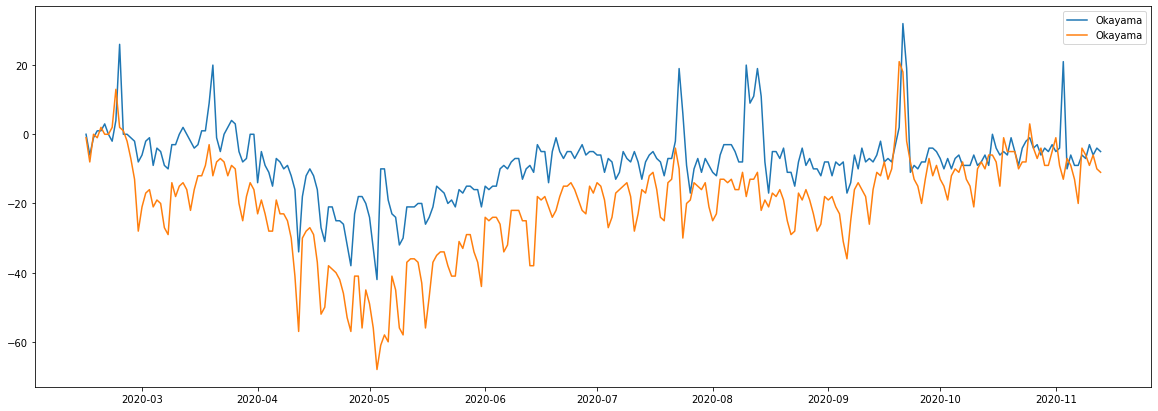

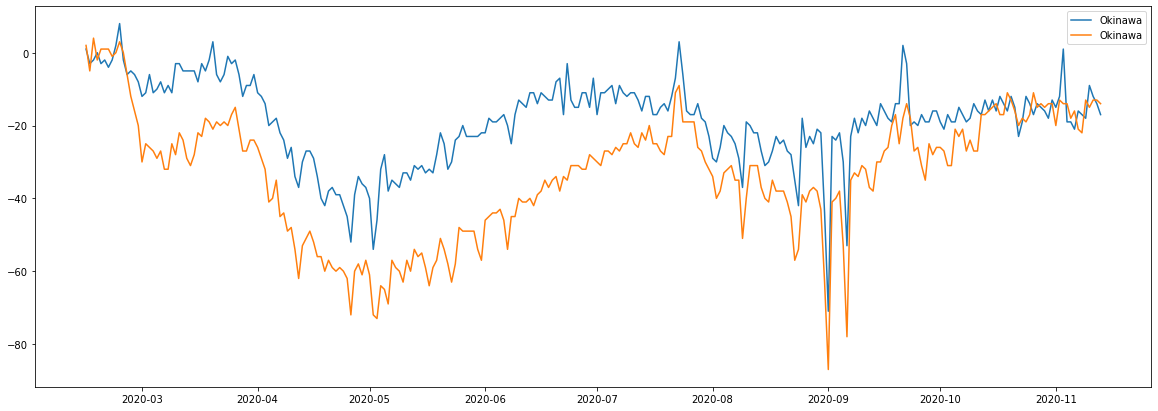

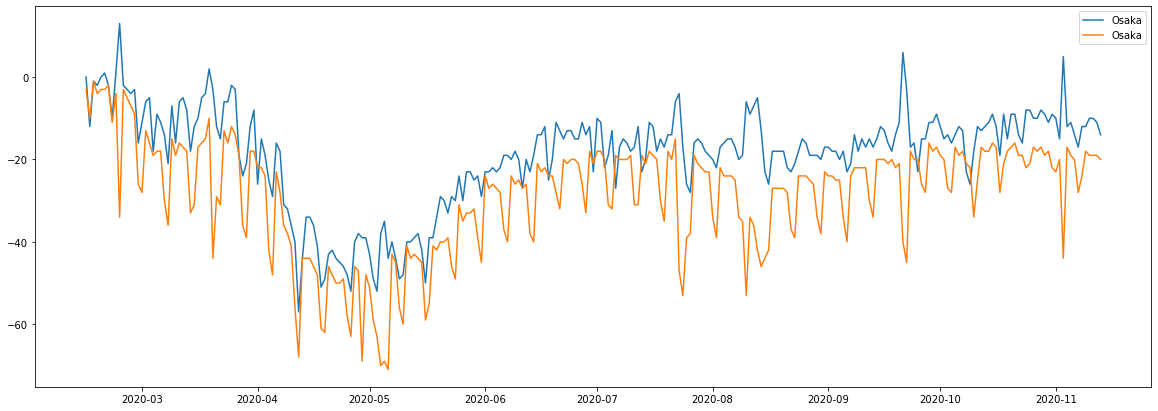

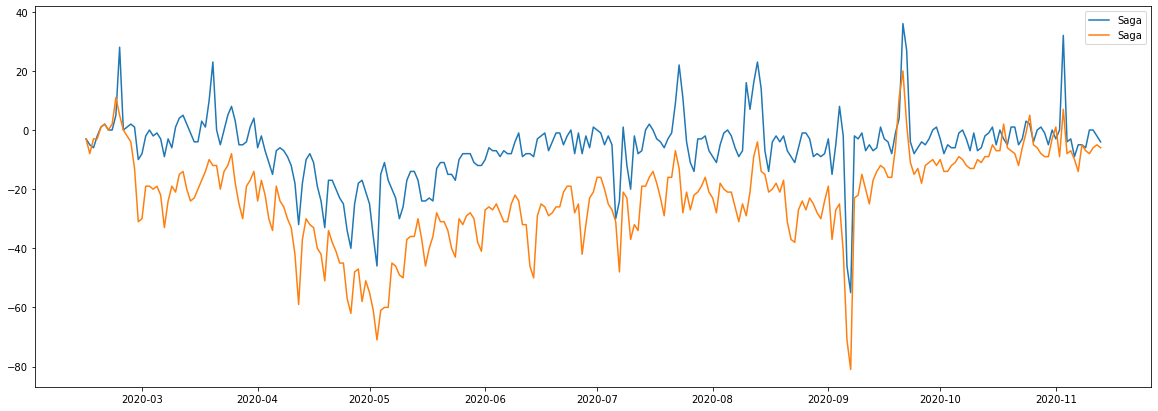

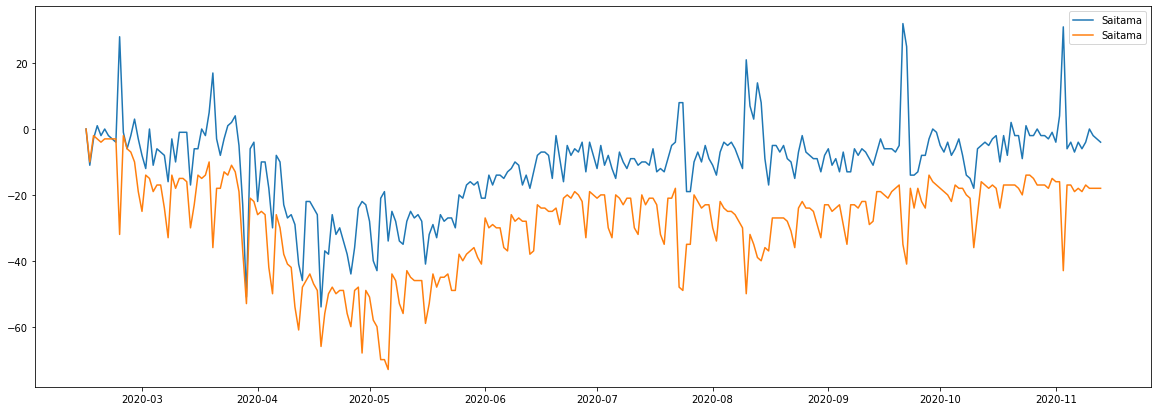

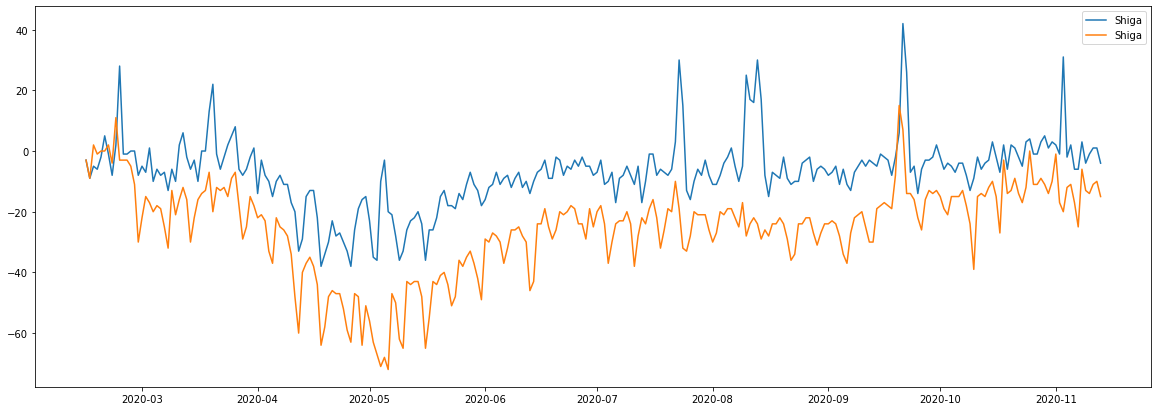

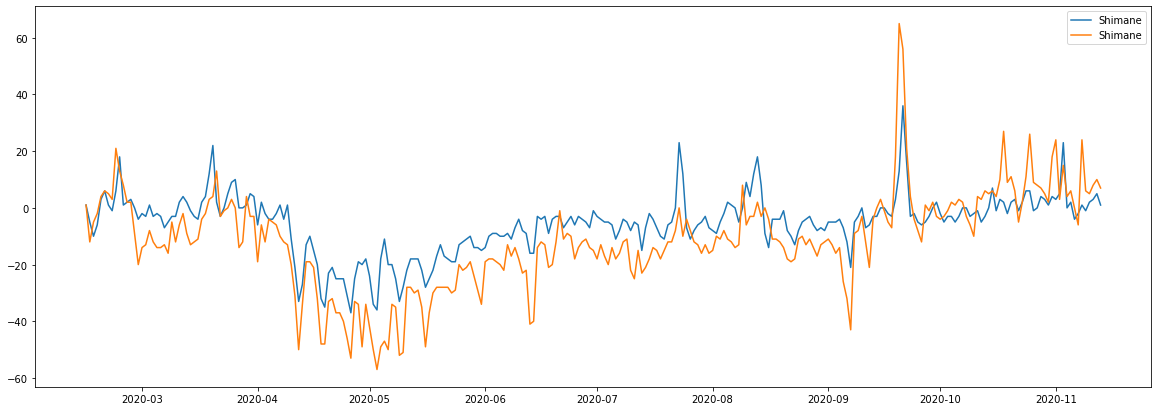

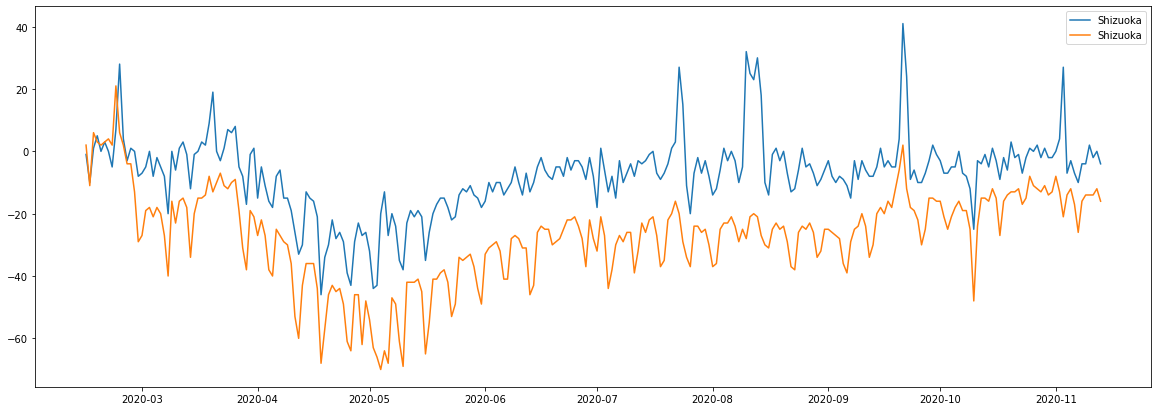

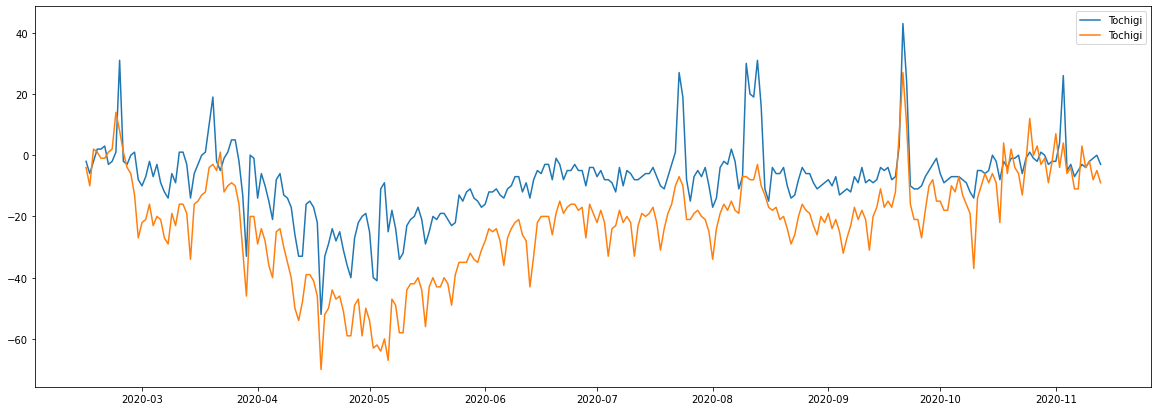

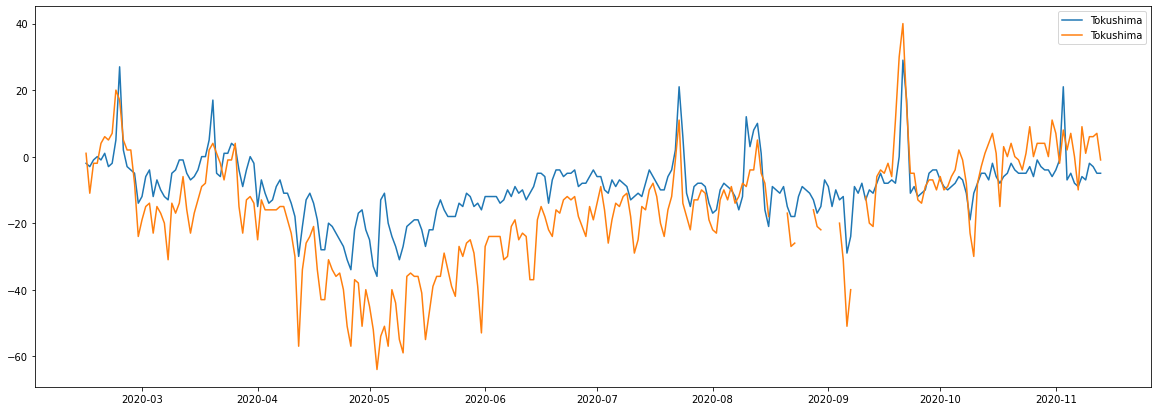

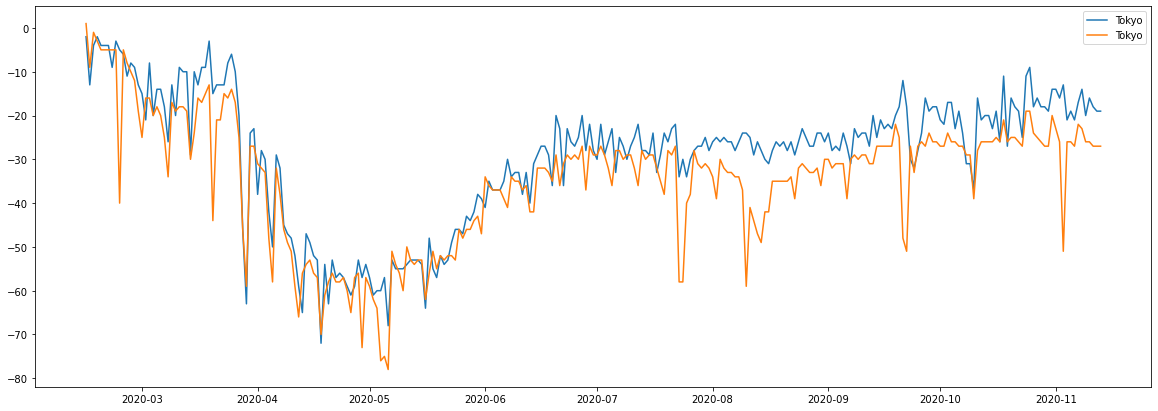

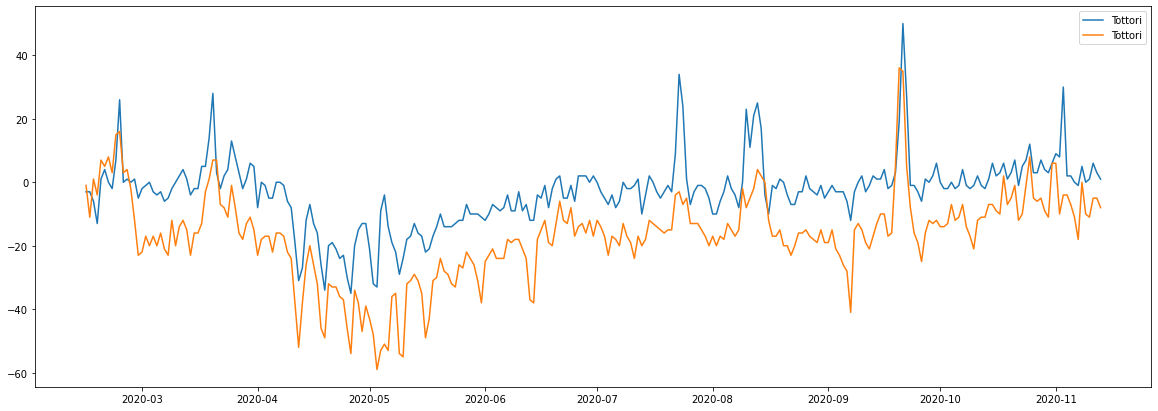

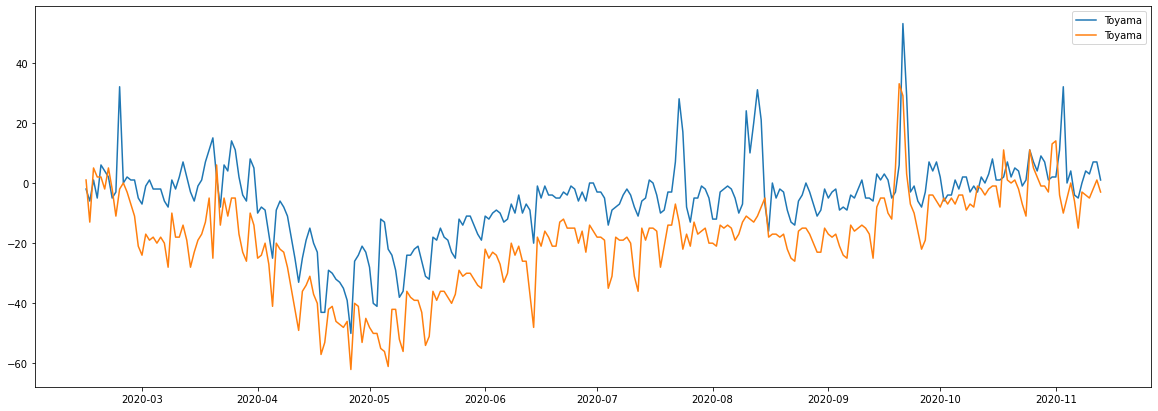

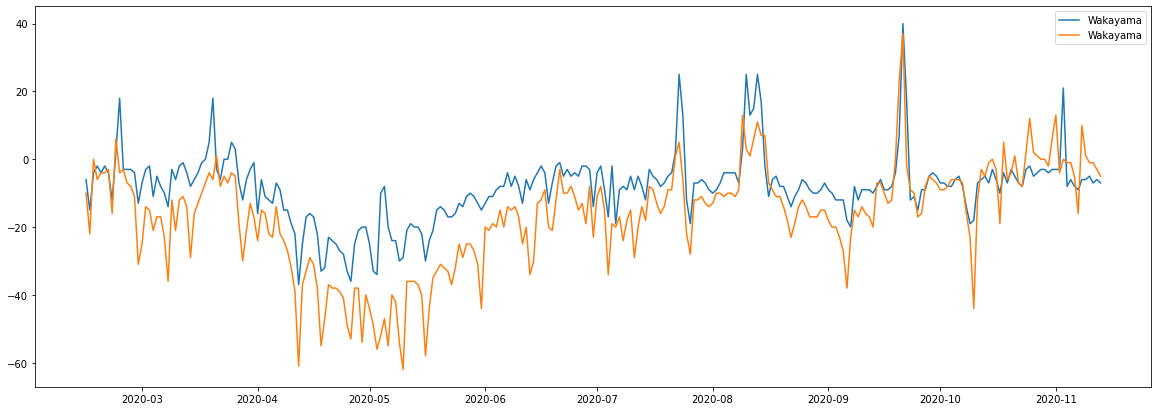

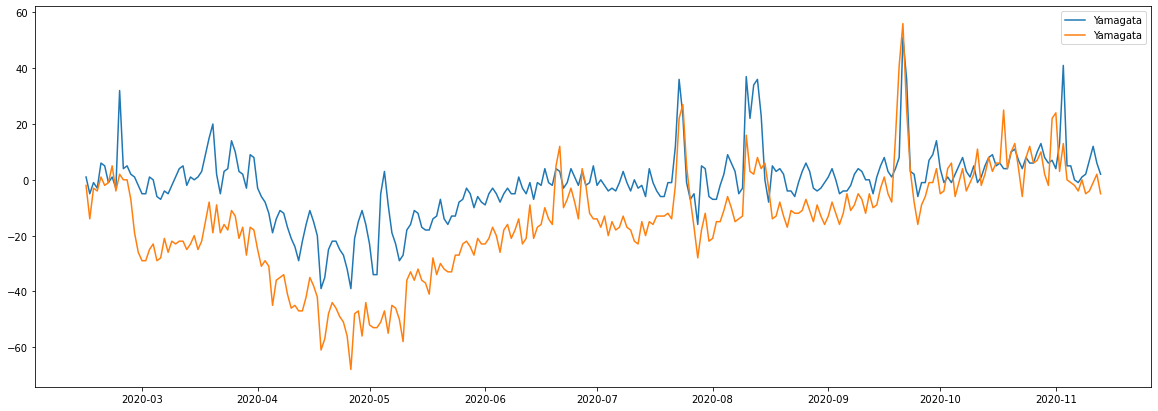

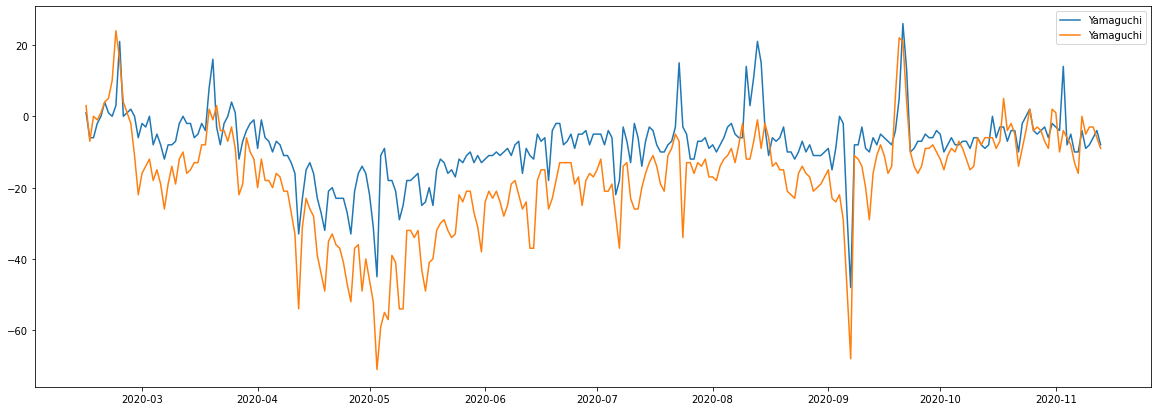

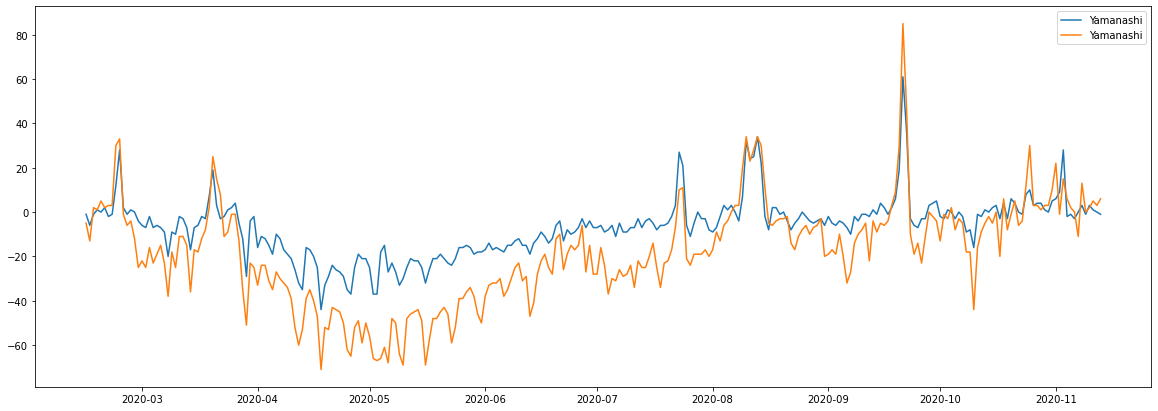

In [91]:
plt.figure(figsize=(20,7))
for key,grp in sub_mb.reset_index().groupby('sub_region_1'):
    plt.figure(figsize=(20,7))
    grp['date'] = pd.to_datetime(grp['date'])
    plt.plot(grp['date'],grp['retail_and_recreation_percent_change_from_baseline'],label=key)
    plt.plot(grp['date'],grp['transit_stations_percent_change_from_baseline'],label=key)
    
    plt.legend(labels=grp['sub_region_1'])
plt.show()

C:\Users\kmtk49\Anaconda3\envs\TF2-GPU\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kmtk49\Anaconda3\envs\TF2-GPU\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


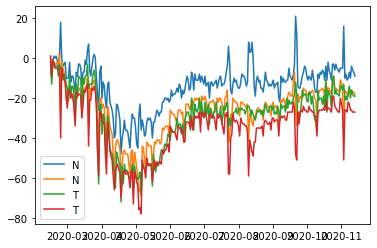

In [128]:
mb_nan=mb.fillna(0)
mb_na = mb_nan[mb_nan['sub_region_1']==0]
mb_na['date']= pd.to_datetime(mb_na['date'])
mb_na.index = mb_na['date']

mb_tk = mb_nan[mb_nan['sub_region_1']=='Tokyo']
mb_tk['date']= pd.to_datetime(mb_tk['date'])
mb_tk.index = mb_tk['date']

plt.plot(mb_na.index,mb_na['retail_and_recreation_percent_change_from_baseline'])
plt.plot(mb_na.index,mb_na['transit_stations_percent_change_from_baseline'])
plt.legend(labels = 'mb_na')
plt.plot(mb_tk.index,mb_tk['retail_and_recreation_percent_change_from_baseline'])
plt.plot(mb_tk.index,mb_tk['transit_stations_percent_change_from_baseline'])
plt.legend(labels = 'NNTT')

# 東京の娯楽と乗換駅データのみ抽出

In [141]:
tk = mb[mb['sub_region_1']=='Tokyo']
tk['date']= pd.to_datetime(tk['date'])
mb.index = mb['date']
tk1 = tk.iloc[:,[8,11]]
tk1

C:\Users\kmtk49\Anaconda3\envs\TF2-GPU\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


retail_and_recreation_percent_change_from_baseline  \
date                                                             
2020-02-15                                                 -2    
2020-02-16                                                -13    
2020-02-17                                                 -4    
2020-02-18                                                 -2    
2020-02-19                                                 -4    
...                                                       ...    
2020-11-09                                                -20    
2020-11-10                                                -16    
2020-11-11                                                -18    
2020-11-12                                                -19    
2020-11-13                                                -19    

            transit_stations_percent_change_from_baseline  
date                                                       
2020-02-15                                            1.0  
2020-02-16                                           -9.0  
2020-02-17                                           -1.0  
2020-02-18                                           -3.0  
2020-02-19                                           -5.0  
...                                                   ...  
2020-11-09                                          -26.0  
2020-11-10                                          -26.0  
2020-11-11                                          -27.0  
2020-11-12                                          -27.0  
2020-11-13                                          -27.0  

[273 rows x 2 columns]

In [5]:
tk = mb[mb['sub_region_1']=='Tokyo']
tk['date']= pd.to_datetime(tk['date'])

tk1 = tk.iloc[:,[7,8,11]]
tk1

C:\Users\kmtk49\Anaconda3\envs\TF2-GPU\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


date  retail_and_recreation_percent_change_from_baseline  \
11193 2020-02-15                                                 -2    
11194 2020-02-16                                                -13    
11195 2020-02-17                                                 -4    
11196 2020-02-18                                                 -2    
11197 2020-02-19                                                 -4    
...          ...                                                ...    
11461 2020-11-09                                                -20    
11462 2020-11-10                                                -16    
11463 2020-11-11                                                -18    
11464 2020-11-12                                                -19    
11465 2020-11-13                                                -19    

       transit_stations_percent_change_from_baseline  
11193                                            1.0  
11194                                           -9.0  
11195                                           -1.0  
11196                                           -3.0  
11197                                           -5.0  
...                                              ...  
11461                                          -26.0  
11462                                          -26.0  
11463                                          -27.0  
11464                                          -27.0  
11465                                          -27.0  

[273 rows x 3 columns]

In [ ]:
tk['date']= pd.to_datetime(tk['date'])
tk.index = tk['date']